In [1]:

from keras.models import Sequential
import tensorflow as tf   
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.layers import Dense, Flatten, MaxPooling2D

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
imageDataGen = tf.keras.preprocessing.image.ImageDataGenerator(
    zca_epsilon=1e-06,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input,
    validation_split=0.2,
)
trainDS = imageDataGen.flow_from_directory('../data/Dog_Cat', batch_size=8,target_size=(224,224), subset="training")
validationDS = imageDataGen.flow_from_directory('../data/Dog_Cat', batch_size=8,target_size=(224,224), subset="validation")


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [3]:
mobilenet = MobileNet(include_top=False, weights='imagenet', input_shape=(224,224,3))

In [4]:
model=Sequential([
    mobilenet,
    MaxPooling2D(3,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(256,activation='relu'),
    Dense(2,activation='softmax')  #softmax gives better result than sigmoid
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 1024)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 2)                 5

In [6]:
model.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer='adam')
history=model.fit(trainDS, validation_data=validationDS, epochs=20, batch_size=64, verbose=1)

Epoch 1/20
100/100 [==============================] - 84s 816ms/step - loss: 1.0725 - accuracy: 0.7825 - val_loss: 1.1259 - val_accuracy: 0.5950

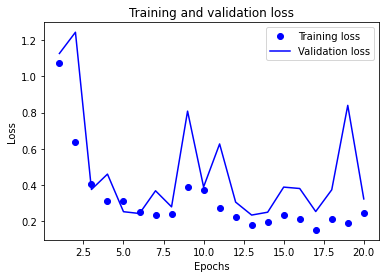

In [7]:
history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [8]:
score = model.evaluate(validationDS) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

25/25 [==============================] - 7s 259ms/step - loss: 0.3134 - accuracy: 0.8650